<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import string
import matplotlib.pyplot as plt
# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
#loading the dataset that i will use throughout the entire thing
stats=pd.read_csv('./sat_scores.csv')

#converting the dataset to a dictionary using .to_dict()
stats_dict=stats.to_dict()
stats_dict.keys()

['Math', 'State', 'Rate', 'Verbal']

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

My comment:
There is no difference whatsoever in the dtypes(data types) of the two methods.

In [3]:
#Creating a DataFrame from the Dictionary that i just made which was made using dataframe itself
#going in circles nice: 
stats_dict=pd.DataFrame(stats_dict)
stats_dict.head()
stats_dict.dtypes

# Creating a DataFrame from the data file itself again:
stats_df=pd.read_csv('./sat_scores.csv')
stats_df.head()
stats_df.dtypes


State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

My comments:
The data is describing the SAT scores of each state and their participation rate in percentage.
Furthermore, the Verbal score's and Math score's are most likely operating on the same unit of measurement because they seem very similar and the states are noted by their initials.


In [4]:
print stats.head(10)
stats.describe()
#rate is rate of participation in percentage 

  State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516
5    RI    71     501   499
6    PA    71     500   499
7    VT    69     511   506
8    ME    69     506   500
9    VA    68     510   501


,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


# <img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [5]:
#Creating variables to use:
data={}
columns=stats.columns
description=['State Initials','Rate of Participation in Percentage','Average SAT score in literacy','Average SAT score in numeracy']
#Adding variables to Keys in the dictionary  
data['Variable']=columns
data['Description']=description
data['Type']=stats.dtypes
data['Shape']=[[1,52],[1,52],[1,52],[1,52]]
#Converting dictionary to dataframe and replacing the index
datas=pd.DataFrame(data)
datas.set_index('Variable',inplace=True, drop=True)

datas

,Description,Shape,Type
Variable,,,
State,State Initials,"[1, 52]",object
Rate,Rate of Participation in Percentage,"[1, 52]",int64
Verbal,Average SAT score in literacy,"[1, 52]",int64
Math,Average SAT score in numeracy,"[1, 52]",int64


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

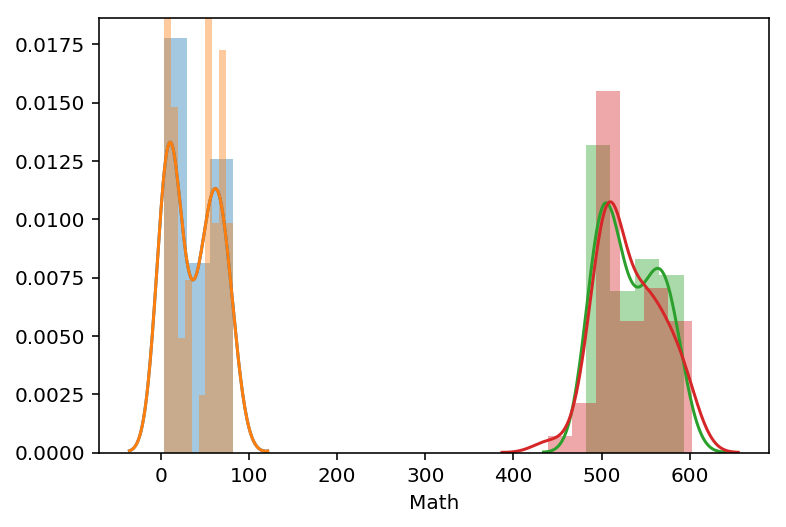

In [6]:

#making a plot using slightly different bins, 'ta da!':
sns.distplot(stats['Rate'])
sns.distplot(stats['Rate'],bins=10)
sns.distplot(stats['Verbal'])
sns.distplot(stats['Math'])



### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)


My comment:
The pairplot function gives us a visual representation through a scatter plot the relationship between the different Values
Furthermore, there seems to be a fairly good correaltion between the graphs indicating that the Values are indeed connected.

In [1]:
#Making more plots, woohoo!! plotting galore yeah!:
_=sns.pairplot(stats)

NameError: name 'sns' is not defined

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

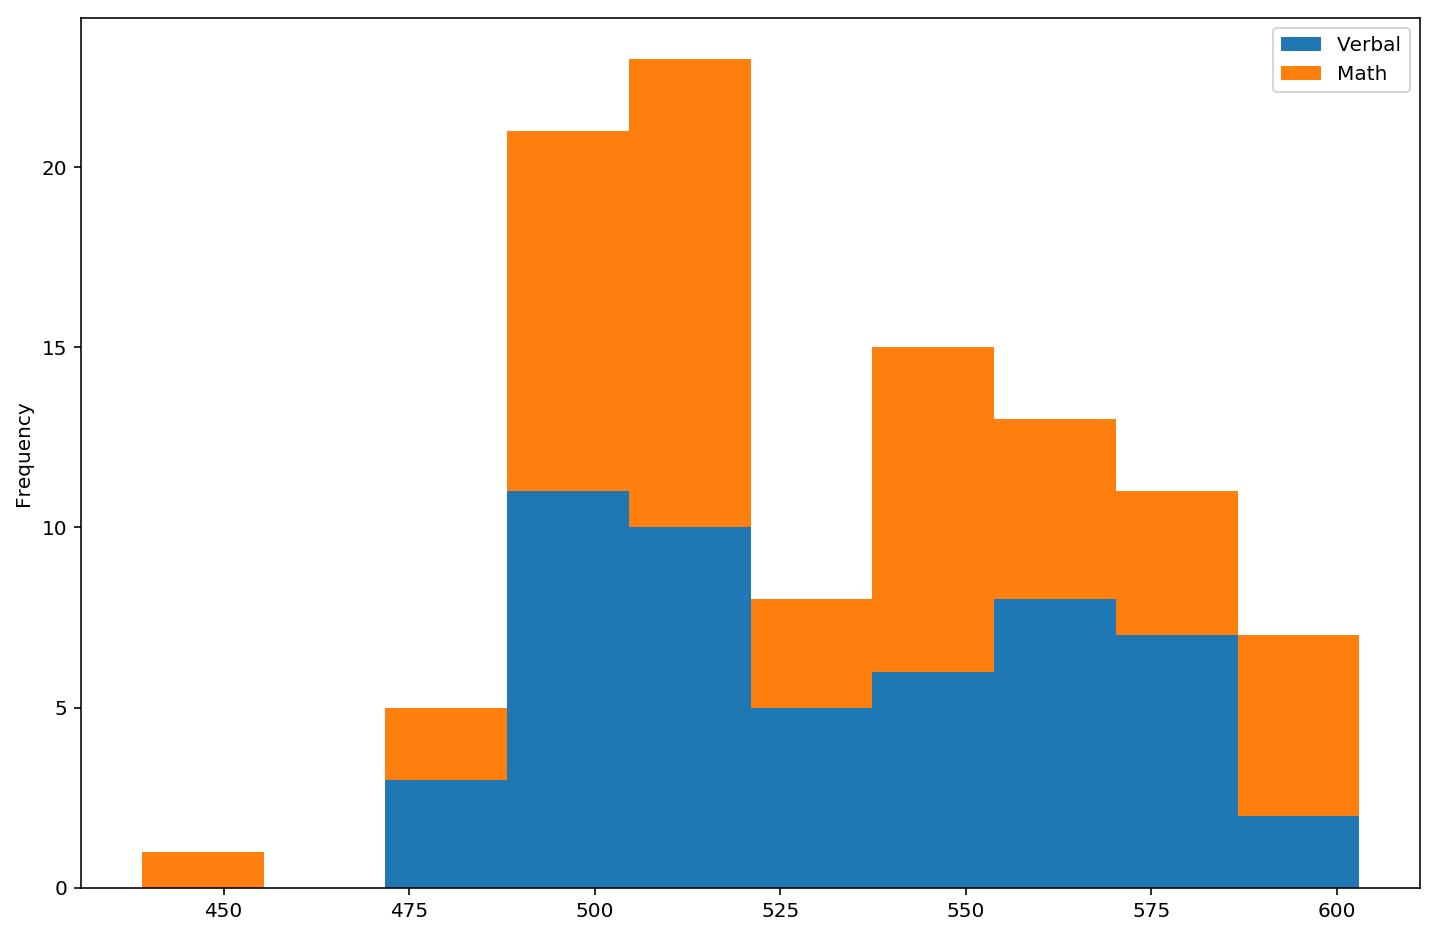

In [8]:
#This is yours you gave me the code for this:
# and your right stacked sucks
stats[['Verbal', 'Math']].plot.hist(stacked=True, figsize=(12,8))

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

My Comment:
The benefits of a boxplot is you that it summarizes the data and presents it beautifully compared to scatter and histogram
and points out clearly the outliers that other graphs dont.

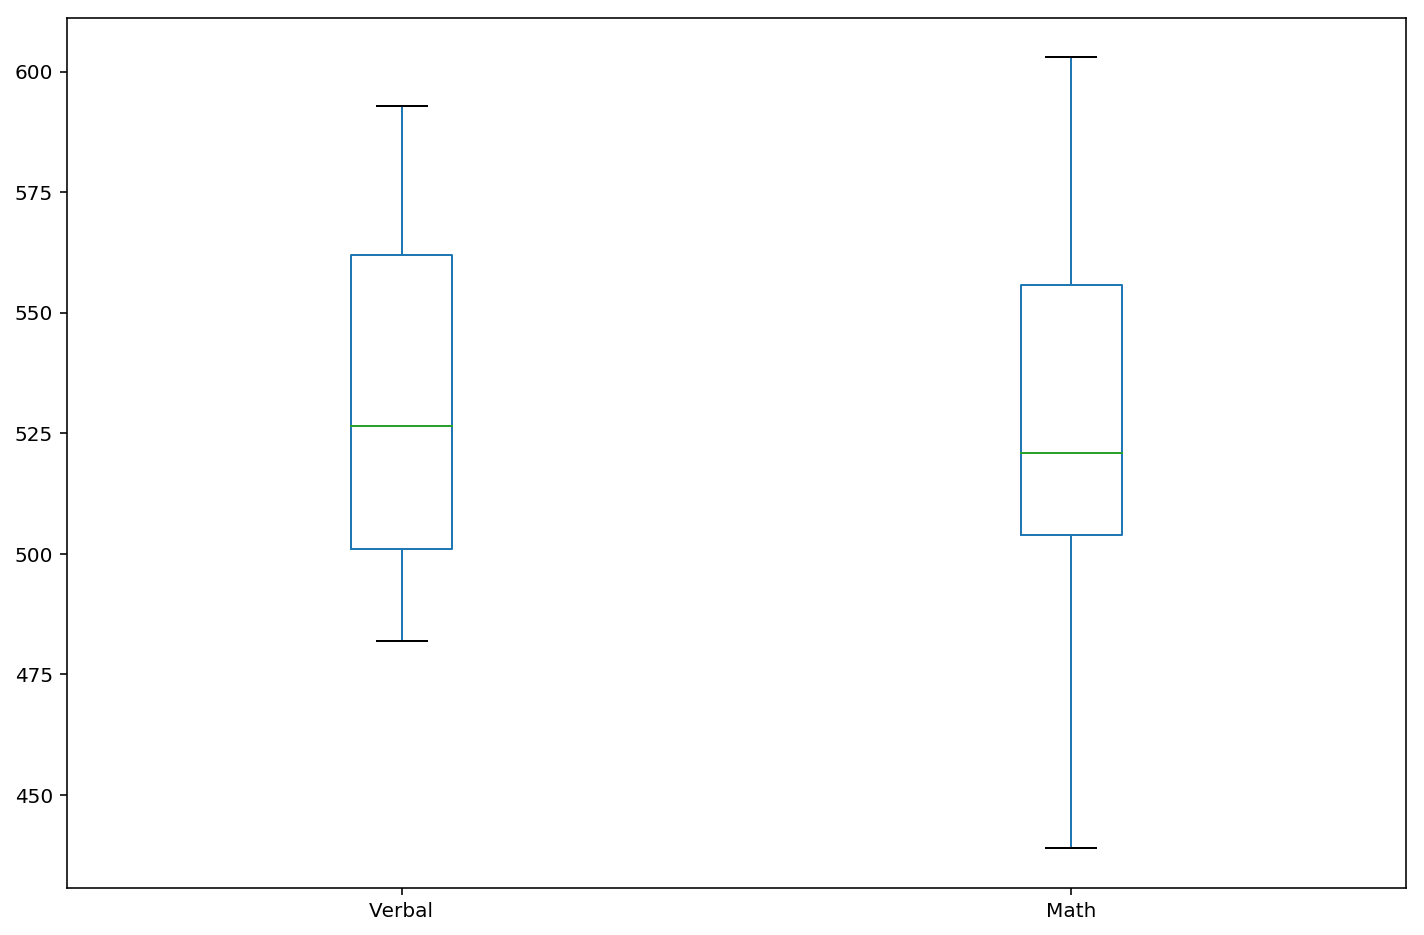

In [9]:
stats.drop('Rate',axis=1).plot(kind='box',figsize=(12,8))

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


My Comment:
I decided to standardize the data to its z-score place all the data on the same measure of unit which allows readers to visually compare the boxplots

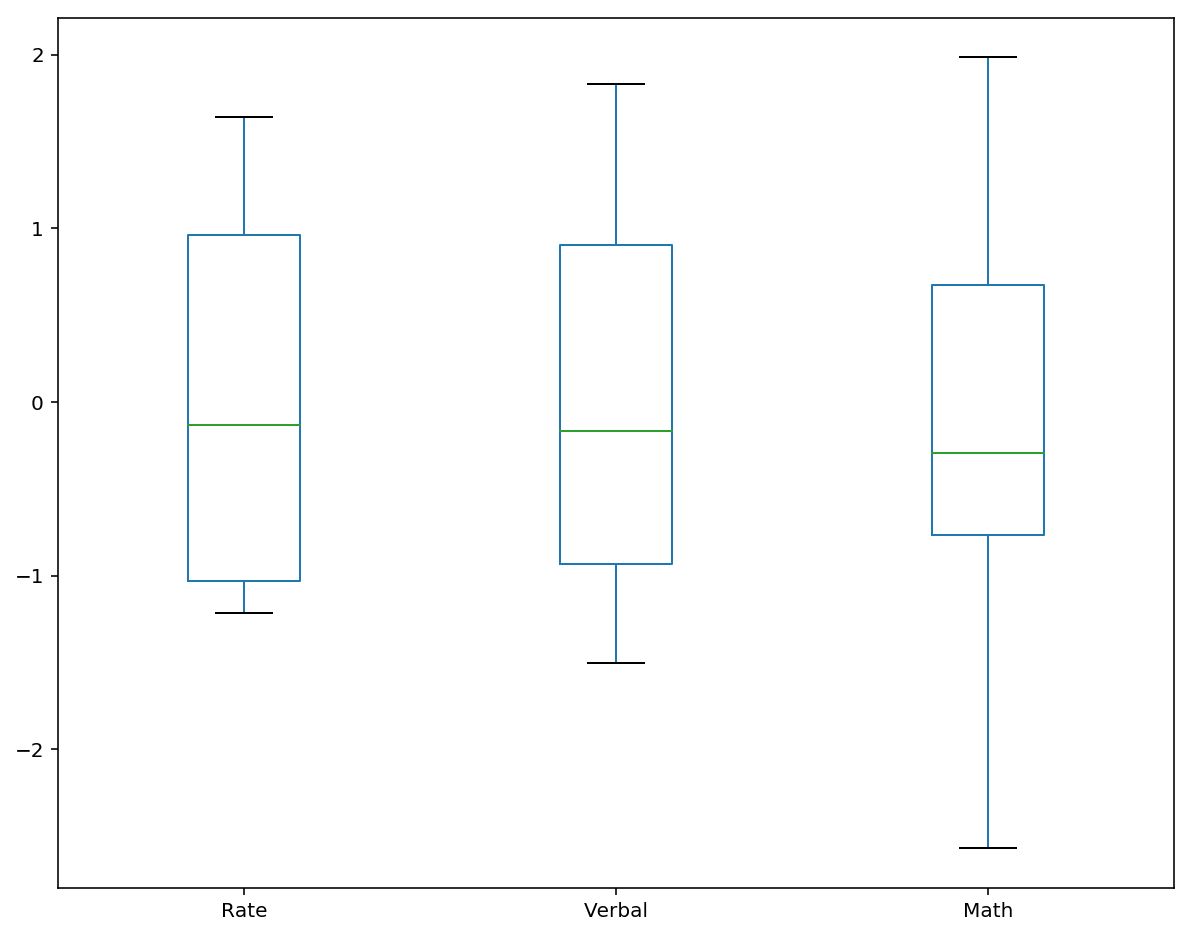

In [10]:
#Creating a function that takes in a dataset
def z_score(data):
#     making the a columns varible from index 1 because i just want them and the first one
#     the first children are always treated like shit, experimented upon aren't they
#     they are the first projects of the parents
    
    column=data.columns[1:]
    
#     created a dataframe that takes each value minus's it by the mean of the column and then divides it by the std of said column
#     basically caculating the z_score and turning that into a new dataframe
    table=pd.DataFrame(data[column]-data[column].mean())/data[column].std()
#     
    return table

#plotting it   
_=z_score(stats).plot(kind='box',figsize=(10,8))


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




My Comment:
There are 24 states above the mean and the distributions indicates a normallt distributed data   

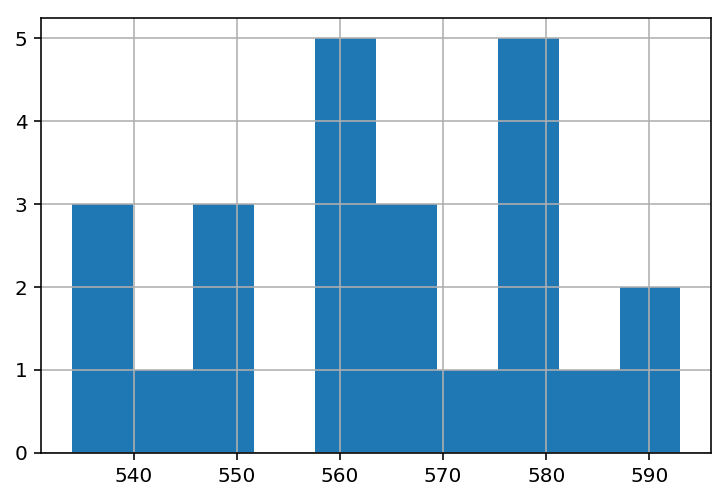

In [11]:
#making a new variable for the mean of 'Verbal'
avg_verbal=stats.Verbal.mean()
#creaing a variable of the dataframe that is all values of 'Verbal' 
state=stats[stats['Verbal']>avg_verbal]
state.head()
state.count()
state['Verbal'].hist()

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

My Comment:
a slightly higher number of countries beat the median score because the mean tend to move based on outliers
and the distribution is fairly similar too 
also because the medain and mean show many similarities it show that the data is infact very normally distributed


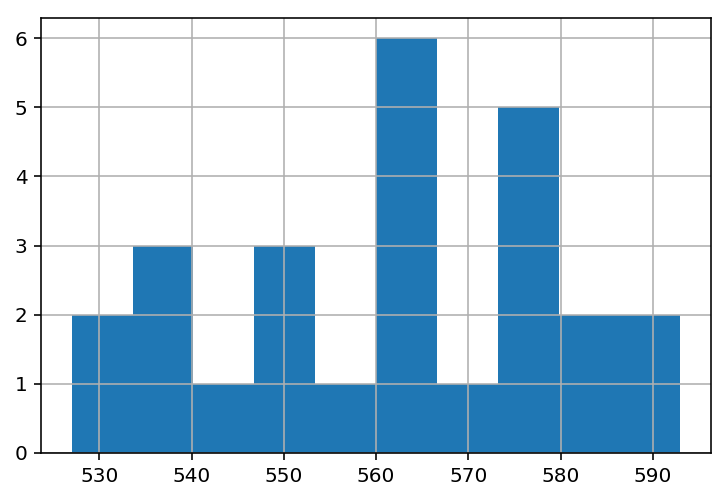

In [12]:

#Creating a Variable of stats dataframe that only includes values in Verbal greater than the median
states=stats[stats['Verbal']>stats.Verbal.median()]
states.head()
states.count()
#Ploting it 
states['Verbal'].hist()

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [13]:
#Creating a new column names Difference whose values are values of Verbal minus the values of Math
stats['Difference']=stats['Verbal']-stats['Math']
stats.head()


,State,Rate,Verbal,Math,Difference
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [14]:
#Creating list of numbers for index column
number=[range(1,53)]
number
#sorting the df 'Difference' column in descending order by default then making that itself a new dataframe and replacing the
#index with numbers
new1=pd.DataFrame(stats.sort_values('Difference')).set_index(number)
#Attaching a new variable to the top 10 first rows which is the 10 states
Math=new1.loc[:10,:]
#Ranking them
Math.index.names=['Rank']
#Top 3
Math.head(3)



#exact same procedure with Math except this time the sorting is ascending and not descending
new2=pd.DataFrame(stats.sort_values('Difference',ascending=False)).set_index(number)
Verbal=new2.loc[:10,:]
Verbal.index.names=['Rank']
Verbal.head(3)


,State,Rate,Verbal,Math,Difference
Rank,,,,,
1,OH,26,534,439,95
2,MS,4,566,551,15
3,WV,18,527,512,15


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


My Comment:
The correlation indicates a high correlation between the three Values however for obvious reasons Difference is not because it is a seperate data on its own and not related to the rest directly.

In [15]:
stats.corr()

,Rate,Verbal,Math,Difference
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
Difference,-0.101412,0.052600,-0.388219,1.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

My comment:
count returns the total number of values in each column
mean: the average of the values of the column
Std: the deviation of data from teh mean 
min: minimum value there is no number lower than this in the column
25%:the value that is at the first quater mark
50%: the medain and value thats in the middle
75%:the value that is at the third quater mark
max: maximum value there is no number higher than this in the column

In [16]:
stats.describe()

,Rate,Verbal,Math,Difference
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

My Comment:
Correlation is metric used to determine the relationship between to datas and can be measured between -1 to 1
however a covariance is number that is at tells us the variation in the data from the mean however there is no criteria to measure it up to like in the case of correlation which is -1 to 1, this does not exist in covriance.
so it is basically pointless mathematics made by drunk mathematicains who wanna pull our legs

In [17]:
stats.cov()

,Rate,Verbal,Math,Difference
Rate,745.387632,-804.355958,-760.803922,-43.552036
Verbal,-804.355958,1104.646682,1077.147059,27.499623
Math,-760.803922,1077.147059,1297.078431,-219.931373
Difference,-43.552036,27.499623,-219.931373,247.430995


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

My Comment:
so thsi data is pretty clean and doesn't require much cleaning thank god however there are missing values which i have replaced with np.nan making them floats and much easier to deal with.
    

In [18]:
drugs=pd.read_csv('./drug-use-by-age.csv')
drugs=drugs.replace('-', np.NaN)
# drugs.info()
drugs.describe()
drug=drugs.iloc[:,1:].astype(float)
drug['age']=drugs['age']
drug

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency,age
0,2798.0,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,0.1,...,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0,12
1,2757.0,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,...,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0,13
2,2792.0,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,0.1,...,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5,14
3,2956.0,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,...,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0,15
4,3058.0,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,...,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0,16
5,3038.0,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,0.1,...,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5,17
6,2469.0,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,0.4,...,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0,18
7,2223.0,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,0.5,...,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0,19
8,2271.0,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,0.9,...,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0,20
9,2354.0,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,0.6,...,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0,21


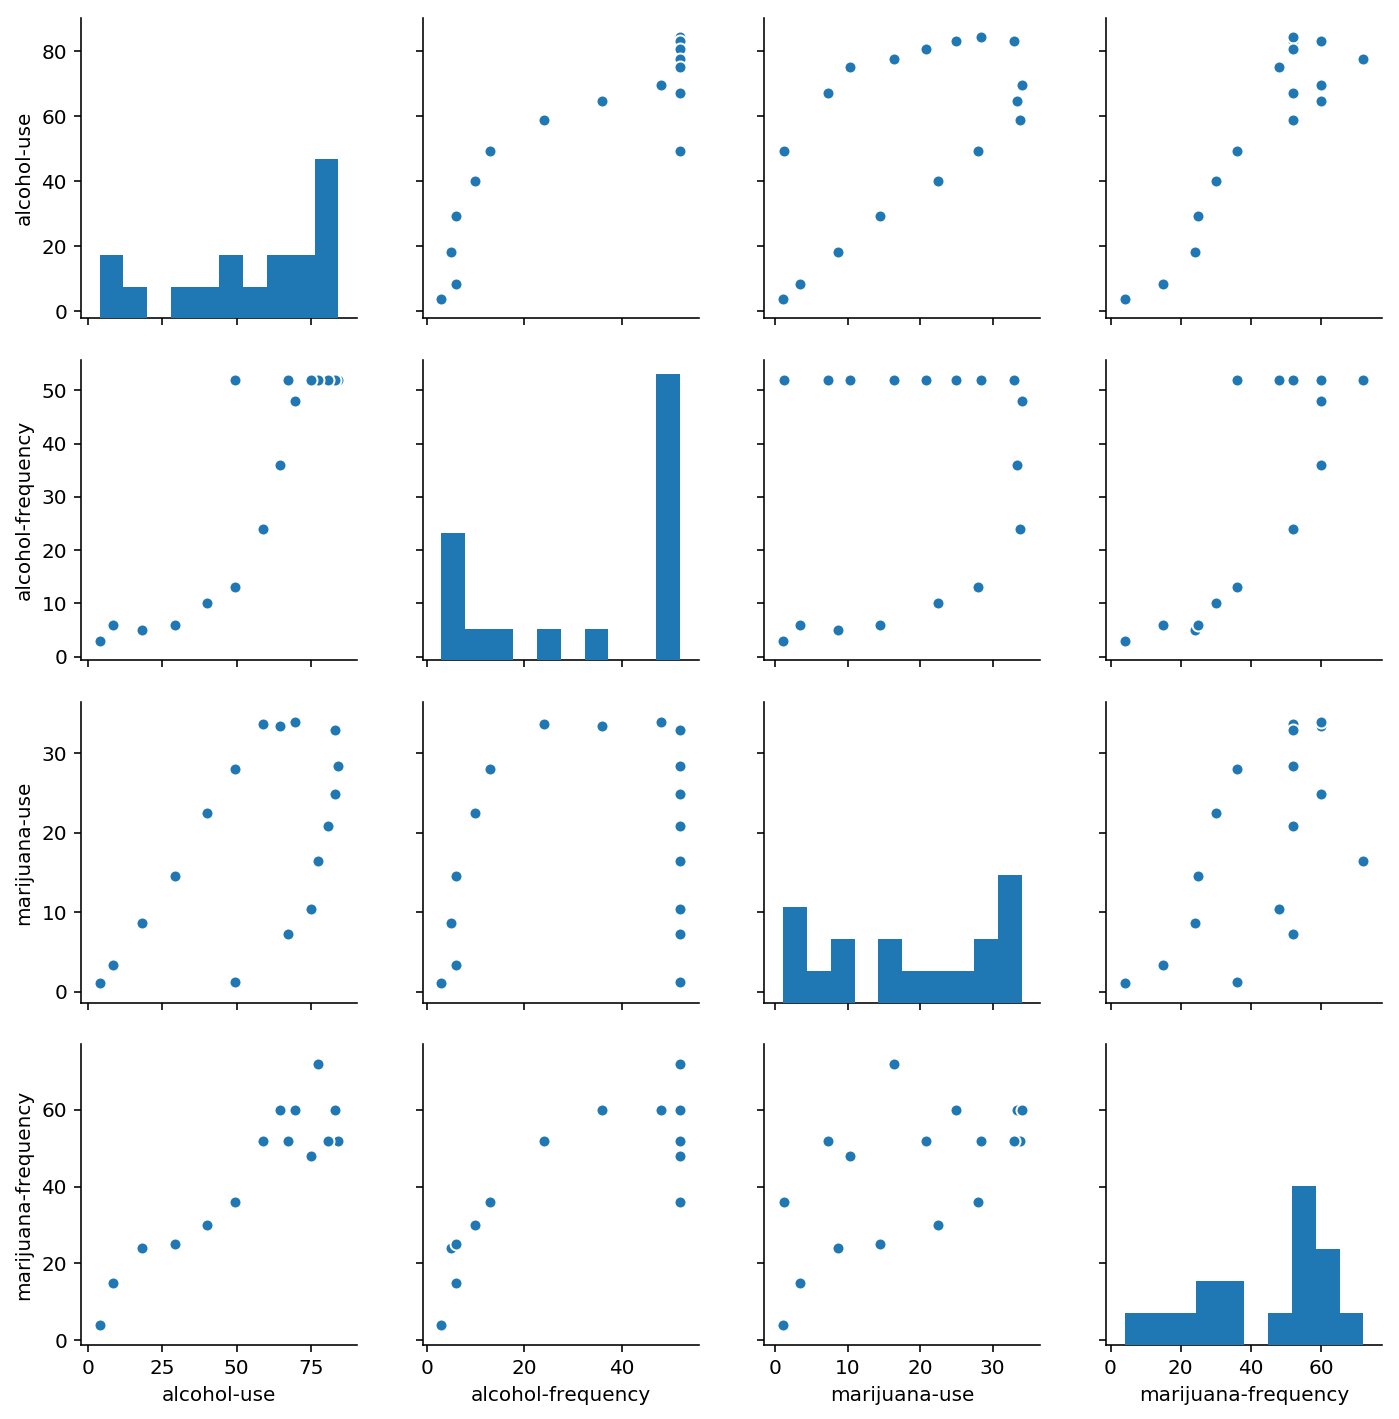

In [19]:
l_drugs=drug[['alcohol-use', 'alcohol-frequency', 'marijuana-use','marijuana-frequency']]
l_drugs.head()
sns.pairplot(l_drugs)

In [20]:
# ([u'n', u'alcohol-use', u'alcohol-frequency', u'marijuana-use',
#        u'marijuana-frequency', u'cocaine-use', u'cocaine-frequency',
#        u'crack-use', u'crack-frequency', u'heroin-use', u'heroin-frequency',
#        u'hallucinogen-use', u'hallucinogen-frequency', u'inhalant-use',
#        u'inhalant-frequency', u'pain-releiver-use', u'pain-releiver-frequency',
#        u'oxycontin-use', u'oxycontin-frequency', u'tranquilizer-use',
#        u'tranquilizer-frequency', u'stimulant-use', u'stimulant-frequency',
#        u'meth-use', u'meth-frequency', u'sedative-use', u'sedative-frequency'],
#       dtype='object')

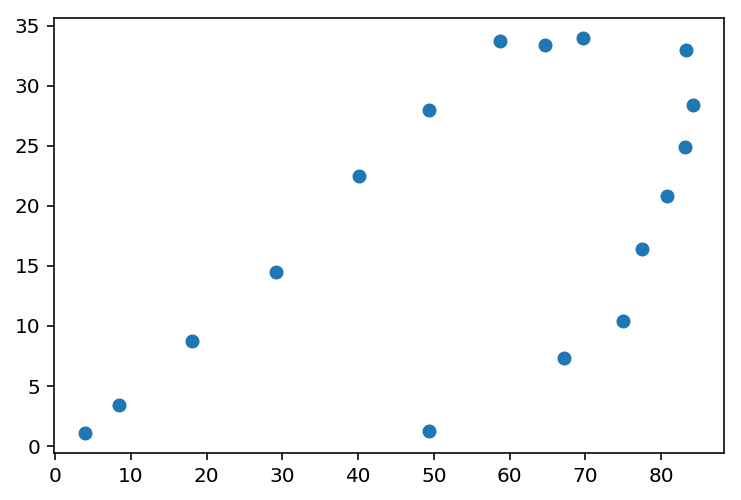

In [21]:
# drug[['alcohol-use','marijuana-use']].hist()
drugs=drug[['alcohol-use','marijuana-use','cocaine-use','crack-use','heroin-use','meth-use','stimulant-use']]
drugs

plt.scatter(x=drugs['alcohol-use'],y=drugs['marijuana-use'])
plt.show()




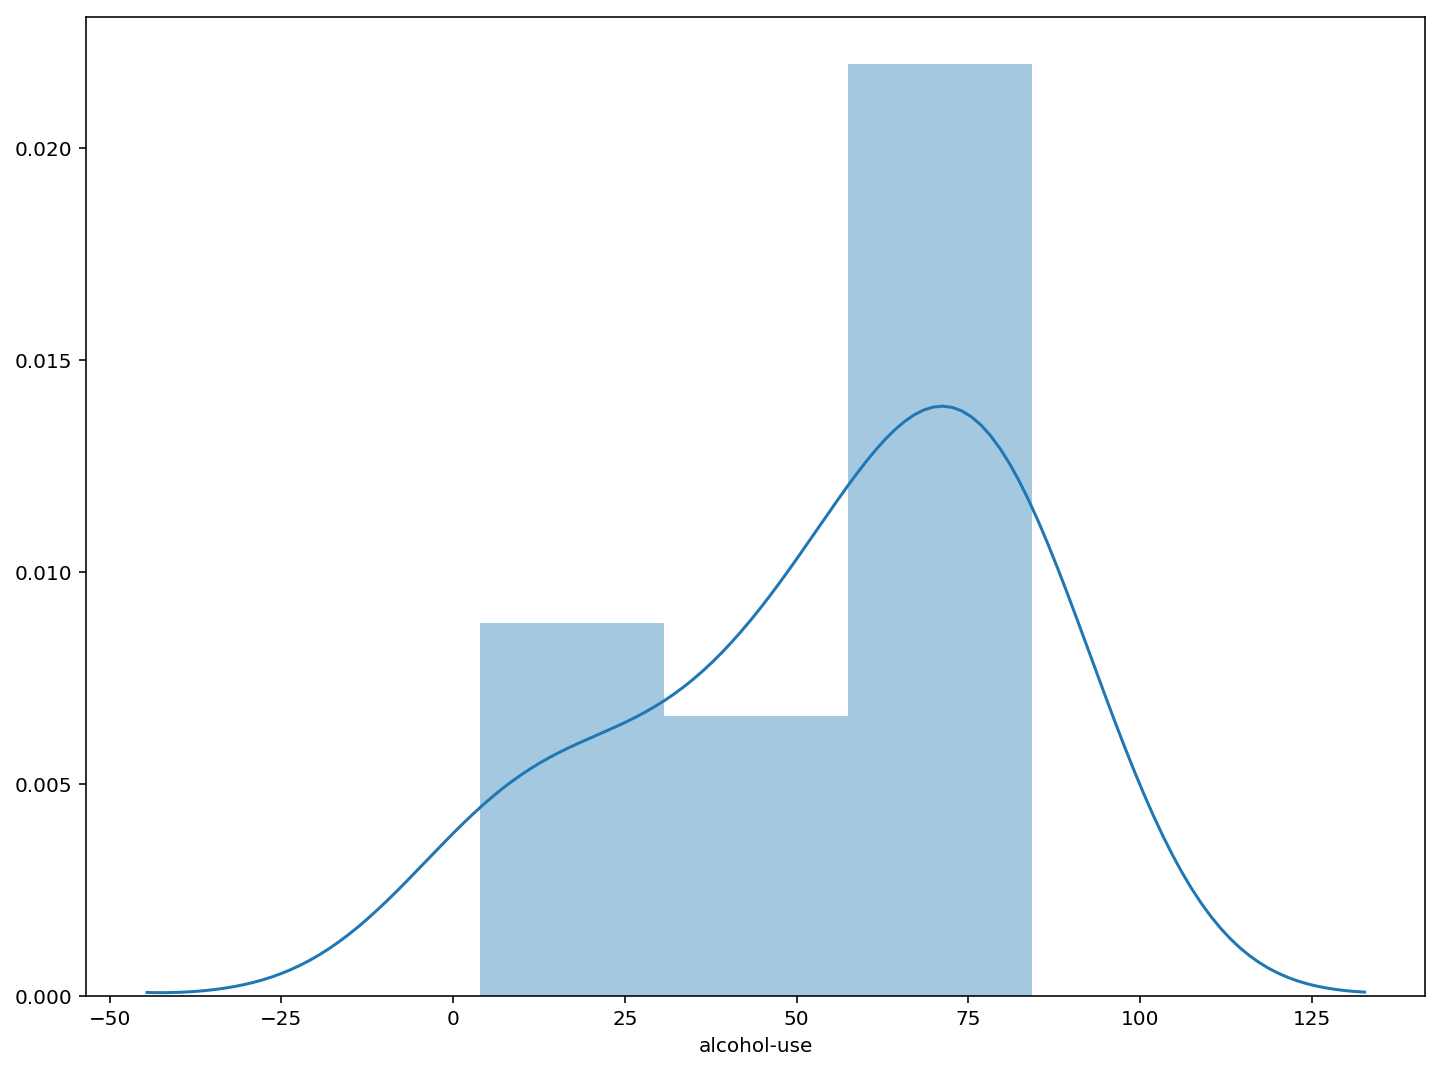

In [22]:
plt.figure(figsize=(12,9))
sns.distplot(drugs['alcohol-use'])
# sns.distplot(drugs['marijuana-use'])
# sns.distplot(drugs['cocaine-use'])
# sns.distplot(drugs['crack-use'])
# sns.distplot(drugs['heroin-use'])
# sns.distplot(drugs['meth-use'])
# sns.distplot(drugs['stimulant-use'])


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

C:\Users\affu\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


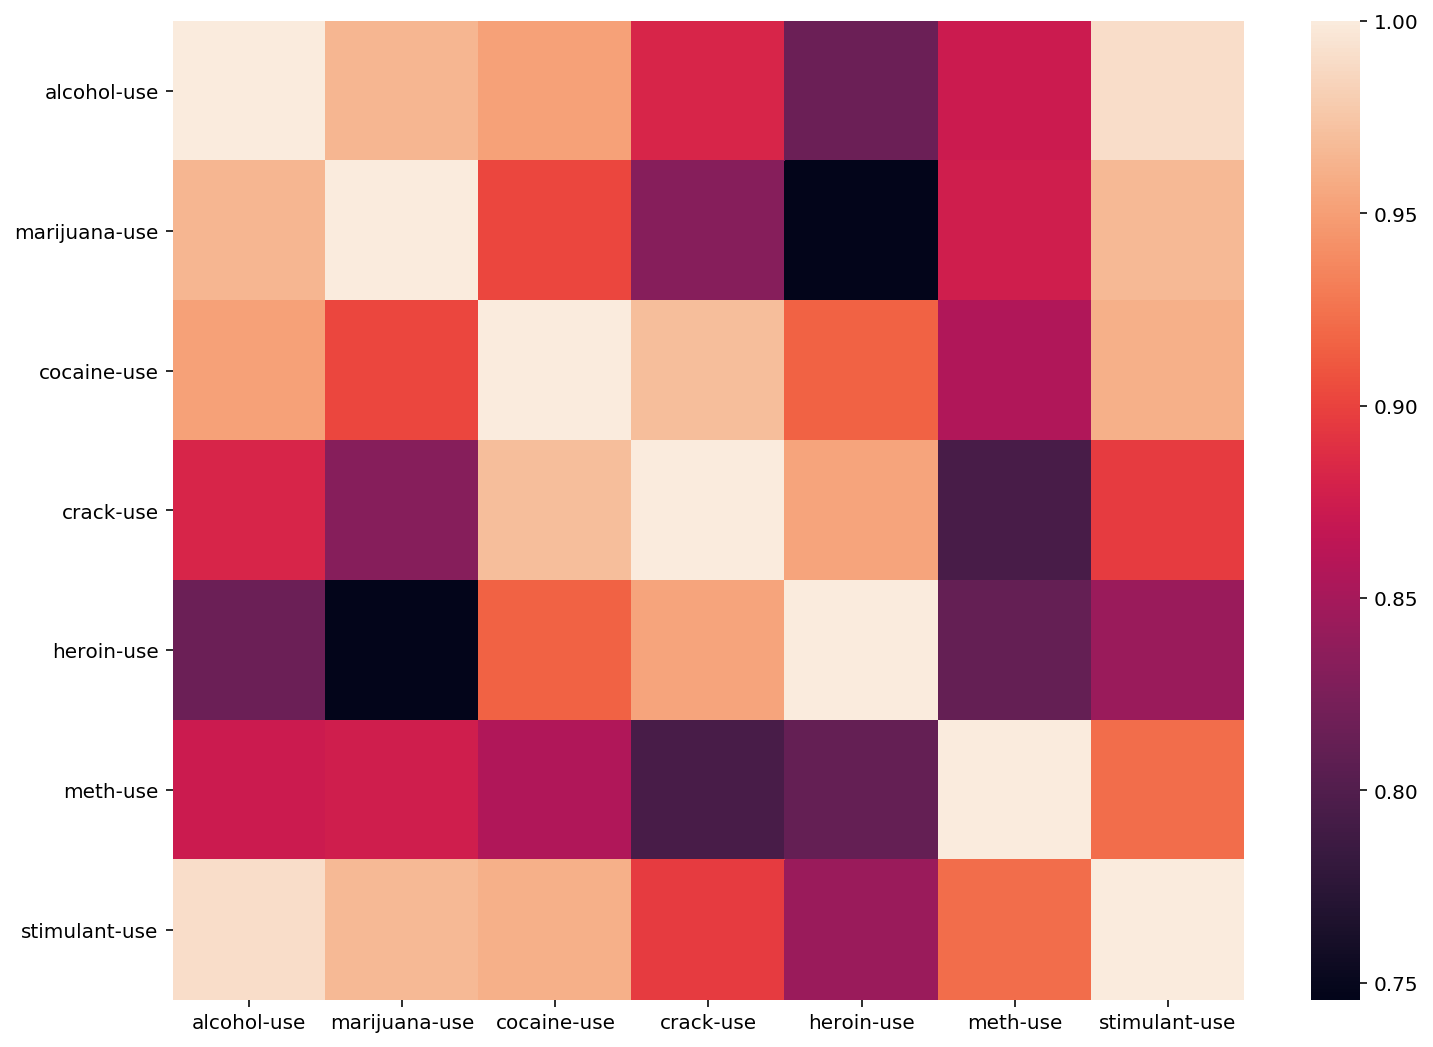

In [23]:
drugs['age']=drug['age']

drugs=drugs.iloc[:10,:]


drugs
plt.figure(figsize=(12,9))
sns.heatmap(drugs.corr())



### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

Null Hypothesis:
there is no difference between the age groups between 12- 21 in terms of alcohol use and frequency.

Alternate Hypothesis:
There is increase in alcohol use and frequency as age group increases



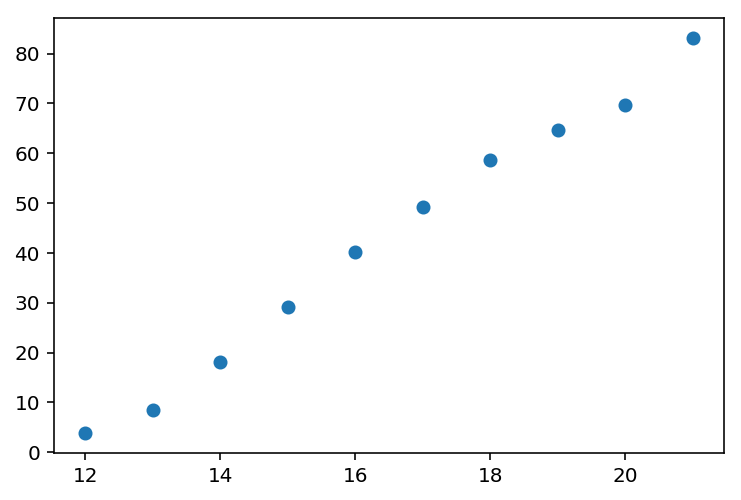

In [31]:
drugss=drug.iloc[:10,:]
drugss
plt.scatter(x=drugss['age'],y=drugss['alcohol-use'])

**Report**



...

In [ ]:
The graph above clearly shows an straighth linear increase over the age group.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.